In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.python.training import training_util

print(tf.__version__)
tf.logging.set_verbosity(tf.logging.INFO)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

c:\users\hrafiq\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.4.0


In [2]:
df = pd.read_csv("GRIR_GCP_Data.csv", sep=",")

In [3]:
df.head(10)

,WERKS,SCENARIO,KTOKK,VSTATU,VPATD,EKORG,EKGRP,TOTGRQTY,TOTIRQTY,NODLGR,NODLIR,DIFGRIRD,DIFGRIRV,STATUS
0,ML01,3,1,1,30,1,A,0,80,0,90,-80,-38100,1
1,ML01,3,1,1,30,1,A,0,107,0,177,-107,-41600,0
2,ML01,3,1,1,30,1,A,0,107,0,152,-107,-27600,1
3,ML01,3,1,1,30,1,A,0,96,0,79,-96,-13800,1
4,ML01,3,1,1,30,1,A,0,146,0,192,-146,-73500,0
5,ML01,3,1,1,60,1,A,0,189,0,139,-189,-26600,1
6,ML01,3,1,1,60,1,A,0,183,0,48,-183,-69200,0
7,ML01,3,1,1,60,1,A,0,159,0,195,-159,-73600,0
8,ML01,3,1,1,60,1,A,0,185,0,79,-185,-59500,0
9,ML01,3,1,1,60,1,A,0,91,0,168,-91,-4700,1


In [4]:
df.describe()

,SCENARIO,KTOKK,VSTATU,VPATD,EKORG,TOTGRQTY,TOTIRQTY,NODLGR,NODLIR,DIFGRIRD,DIFGRIRV,STATUS
count,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0
mean,2.6,1.5,1.1,60.3,1.3,65.9,94.1,103.1,89.5,-28.2,-6716.3,0.4
std,1.1,0.5,0.3,24.4,0.5,63.0,62.4,82.0,75.0,63.2,22797.4,0.5
min,1.0,1.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,-200.0,-75000.0,0.0
25%,2.0,1.0,1.0,30.0,1.0,0.0,54.0,0.0,10.0,-56.0,-9600.0,0.0
50%,3.0,1.0,1.0,60.0,1.0,55.0,99.0,112.0,82.0,-2.0,-546.0,0.0
75%,4.0,2.0,1.0,90.0,2.0,121.0,146.0,172.0,154.0,11.0,5482.0,1.0
max,4.0,2.0,2.0,90.0,2.0,200.0,200.0,268.0,242.0,74.0,59200.0,1.0


In [5]:
df.columns

Index(['WERKS', 'SCENARIO', 'KTOKK', 'VSTATU', 'VPATD', 'EKORG', 'EKGRP',
       'TOTGRQTY', 'TOTIRQTY', 'NODLGR', 'NODLIR', 'DIFGRIRD', 'DIFGRIRV',
       'STATUS'],
      dtype='object')

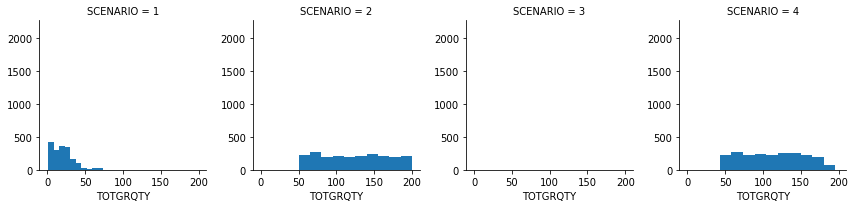

In [6]:
#Facet1
g = sns.FacetGrid(df, col="SCENARIO")
g = g.map(plt.hist, "TOTGRQTY")
plt.show()

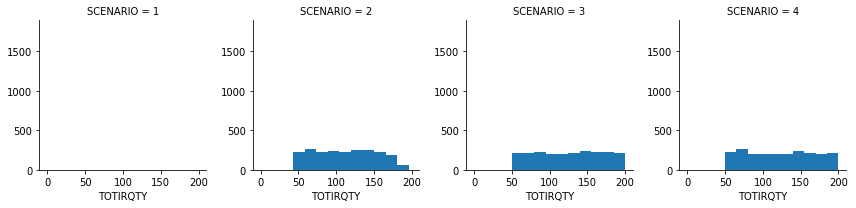

In [7]:
#Facet1
g = sns.FacetGrid(df, col="SCENARIO")
g = g.map(plt.hist, "TOTIRQTY")
plt.show()

In [8]:
#Filter out scenario = 3 ( It has TOTGRQTY == 0 )
df_s1 = df[df['SCENARIO'].eq(3) & df['TOTGRQTY'].eq(0)]
df_s1

,WERKS,SCENARIO,KTOKK,VSTATU,VPATD,EKORG,EKGRP,TOTGRQTY,TOTIRQTY,NODLGR,NODLIR,DIFGRIRD,DIFGRIRV,STATUS
0,ML01,3,1,1,30,1,A,0,80,0,90,-80,-38100,1
1,ML01,3,1,1,30,1,A,0,107,0,177,-107,-41600,0
2,ML01,3,1,1,30,1,A,0,107,0,152,-107,-27600,1
3,ML01,3,1,1,30,1,A,0,96,0,79,-96,-13800,1
4,ML01,3,1,1,30,1,A,0,146,0,192,-146,-73500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,ML03,3,2,1,90,2,C,0,115,0,59,-115,-55300,0
2156,ML03,3,2,1,90,2,C,0,120,0,60,-120,-63500,0
2157,ML03,3,2,1,90,2,C,0,157,0,186,-157,-45000,0
2158,ML03,3,2,1,90,2,C,0,97,0,121,-97,-62300,0


In [9]:
#Mark some columns as categorical so that TF treats them as categorical
for col_cat in ['SCENARIO','KTOKK','VSTATU','EKORG']:
    df[col_cat] = df[col_cat].astype('str') #Very important to keep this as STR -> Tensorflow treats only STR as categorical
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8279 entries, 0 to 8278
Data columns (total 14 columns):
WERKS       8279 non-null object
SCENARIO    8279 non-null object
KTOKK       8279 non-null object
VSTATU      8279 non-null object
VPATD       8279 non-null int64
EKORG       8279 non-null object
EKGRP       8279 non-null object
TOTGRQTY    8279 non-null int64
TOTIRQTY    8279 non-null int64
NODLGR      8279 non-null int64
NODLIR      8279 non-null int64
DIFGRIRD    8279 non-null int64
DIFGRIRV    8279 non-null int64
STATUS      8279 non-null int64
dtypes: int64(8), object(6)
memory usage: 905.6+ KB


In [10]:
#Split dataset -> Split 10 times and choose the one with best P values( Significance test )
p_res = {}
t_res = []
for i in range(10):
    np.random.seed(seed=i) #makes result reproducible
    msk = np.random.rand(len(df)) < 0.8
    X_train = df[msk]
    X_test = df[~msk]

    #Run Significance Tests on both the distributions( Train and Test ) for all numerical attributes
    p_res = {}
    for c_ in X_train.columns:
        if not X_train[c_].dtype == 'object':
            try:
                _, a = scipy.stats.ks_2samp(X_train[c_].values,X_test[c_].values)
                #print('P-value for column {} is {}'.format(c_.upper(), a))
                p_res['Random'] = i
                p_res[c_] = a
            except:
                p_res['Random'] = i
                p_res[c_] = 'Error'
    t_res.append(p_res)

p_df = pd.DataFrame(t_res)
p_df

,DIFGRIRD,DIFGRIRV,NODLGR,NODLIR,Random,STATUS,TOTGRQTY,TOTIRQTY,VPATD
0,0.2,0.1,0.3,0.3,0,0.2,0.3,0.6,0.9
1,0.1,0.1,0.1,0.3,1,1.0,0.0,0.8,1.0
2,1.0,0.9,0.8,1.0,2,1.0,0.9,0.4,0.8
3,0.5,0.2,0.1,0.1,3,1.0,0.4,0.9,1.0
4,1.0,0.6,0.5,0.5,4,1.0,1.0,0.9,1.0
5,0.7,0.4,0.2,0.4,5,0.8,0.7,0.2,1.0
6,0.5,0.3,0.4,1.0,6,1.0,0.9,0.7,0.3
7,0.8,0.3,0.7,0.6,7,0.7,0.9,0.8,0.6
8,0.8,0.6,1.0,1.0,8,1.0,0.0,0.3,0.4
9,1.0,0.5,0.4,0.4,9,1.0,0.0,0.1,1.0


In [11]:
#Prepare train and test data set
np.random.seed(seed=2) #makes result reproducible
msk = np.random.rand(len(df)) < 0.8
traindf = df[msk]
evaldf = df[~msk]
#evaldf[evaldf['STATUS'] == 1]

In [12]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6629 entries, 0 to 8278
Data columns (total 14 columns):
WERKS       6629 non-null object
SCENARIO    6629 non-null object
KTOKK       6629 non-null object
VSTATU      6629 non-null object
VPATD       6629 non-null int64
EKORG       6629 non-null object
EKGRP       6629 non-null object
TOTGRQTY    6629 non-null int64
TOTIRQTY    6629 non-null int64
NODLGR      6629 non-null int64
NODLIR      6629 non-null int64
DIFGRIRD    6629 non-null int64
DIFGRIRV    6629 non-null int64
STATUS      6629 non-null int64
dtypes: int64(8), object(6)
memory usage: 776.8+ KB


In [13]:
evaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 16 to 8272
Data columns (total 14 columns):
WERKS       1650 non-null object
SCENARIO    1650 non-null object
KTOKK       1650 non-null object
VSTATU      1650 non-null object
VPATD       1650 non-null int64
EKORG       1650 non-null object
EKGRP       1650 non-null object
TOTGRQTY    1650 non-null int64
TOTIRQTY    1650 non-null int64
NODLGR      1650 non-null int64
NODLIR      1650 non-null int64
DIFGRIRD    1650 non-null int64
DIFGRIRV    1650 non-null int64
STATUS      1650 non-null int64
dtypes: int64(8), object(6)
memory usage: 193.4+ KB


In [14]:
######################################## Tensorflow Pipeline building and Modeling ############################################

In [15]:
#Panda version
def add_new_features(df_temp):
    #All conversion functions - kept internal
    def add_difgrirdbytotgrqty(row):
        if not row['SCENARIO'] == '3':
            return ( row['DIFGRIRD'] / row['TOTGRQTY'] )
        else:
            return (-1)
    
    #Add any feature engineering or new column here
    df_temp['grminusirbyvpatd'] = ( df_temp['TOTGRQTY'] - df_temp['TOTIRQTY'] ) / df_temp['VPATD']
#     df_temp['difgrirdbytotgrqty'] = df_temp.apply(add_difgrirdbytotgrqty, axis = 1)
    return df_temp

In [16]:
# #Dictionary version
# def add_new_features(df_temp):
#     #All conversion functions - kept internal
# #     def add_difgrirdbytotgrqty(d_):
# #         print("aaa..., " d_)
# #         if not d_['SCENARIO'] == '3':
# #             return ( d_['DIFGRIRD'] / d_['TOTGRQTY'] )
# #         else:
# #             return (-1)
    
#     #Add any feature engineering or new column here
#     df_temp['grminusirbyvpatd'] = ( df_temp['TOTGRQTY'] - df_temp['TOTIRQTY'] ) / df_temp['VPATD']
#     df_temp['difgrirdbytotgrqty'] = tf.where( tf.not_equal(df_temp['DIFGRIRD'], 0),
#                                               tf.cast(tf.divide(df_temp['DIFGRIRD'], df_temp['TOTGRQTY']), tf.float32),
#                                               tf.cast(tf.zeros_like(df_temp['DIFGRIRD']), tf.float32))
#     return df_temp

In [17]:
# a = np.array([1, 2, 3])
# b = np.array([2, 0, 2])
# c = {'col1' : a, 'col2' : b}
# d = pd.DataFrame(c)

# op = tf.where( tf.not_equal(c['col2'], 0), tf.cast(tf.divide(c['col1'], c['col2']), tf.float32), 
#                                             tf.cast(tf.zeros_like(c['col1']), tf.float32))

# d['new'] = op
# print(d)

# with tf.Session() as sess:
#     print(sess.run(op))
    
# print(d)

In [18]:
#Test add_new_features for X_train
df_dummy = add_new_features(traindf.copy())
print(df_dummy.head())
print(df_dummy.info())

  WERKS SCENARIO KTOKK VSTATU  VPATD EKORG EKGRP  TOTGRQTY  TOTIRQTY  NODLGR  \
0  ML01        3     1      1     30     1     A         0        80       0   
1  ML01        3     1      1     30     1     A         0       107       0   
2  ML01        3     1      1     30     1     A         0       107       0   
3  ML01        3     1      1     30     1     A         0        96       0   
4  ML01        3     1      1     30     1     A         0       146       0   

   NODLIR  DIFGRIRD  DIFGRIRV  STATUS  grminusirbyvpatd  
0      90       -80    -38100       1              -2.7  
1     177      -107    -41600       0              -3.6  
2     152      -107    -27600       1              -3.6  
3      79       -96    -13800       1              -3.2  
4     192      -146    -73500       0              -4.9  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6629 entries, 0 to 8278
Data columns (total 15 columns):
WERKS               6629 non-null object
SCENARIO            662

In [19]:
#RETURNS a pre-processing function to be used inside pipeline
def create_add_engineered_fn(df):
    #Add new features in the set so that it's details can be copied to parameters of fn_add_engineered
    df = add_new_features(df)
    
    #Get min max for each numerical column to use for scaling
    cols_mean = {}
    cols_std = {}
    num_feats = []
    for col_norm in list(df.columns):
        if not df[col_norm].dtype == 'object' and not col_norm in ['STATUS']:
            cols_mean[col_norm] = df[col_norm].mean()
            cols_std[col_norm] = df[col_norm].std()
            num_feats.append(col_norm)

    #Pass all the above calculated values to be used by main function which will be called in Pipeline
    def fn_add_engineered(features, cols_mean = cols_mean, cols_std = cols_std, num_feats = num_feats):
        #Save value here for 0-1 scaling during training and serving
        print("mean", cols_mean)
        print("std", cols_std)
        
        #print(features)
        
        #Add new features AGAIN as the function add_engineered will be called with data
        features = add_new_features(features)
        
        #Normalize few numerical columns
        for col_norm in list(num_feats):
            mean_value = cols_mean[col_norm]
            std_value = cols_std[col_norm]
            features[col_norm] = (features[col_norm] - mean_value) / std_value

        print("..... Done processing ")
        #print(features)
        return features
    
    return fn_add_engineered

#Generate pre-processing function for X_train
add_engineered = create_add_engineered_fn(traindf.copy())

In [20]:
#Test run add_engineered on copy of X_test
dummy = traindf.copy()
dummy = add_engineered(dummy)
dummy.describe()

mean {'VPATD': 60.37109669633429, 'NODLGR': 103.0917182078745, 'TOTIRQTY': 94.21451199275909, 'DIFGRIRD': -28.31920349977372, 'TOTGRQTY': 65.89530849298536, 'grminusirbyvpatd': -0.5797464004961309, 'DIFGRIRV': -6720.639915522704, 'NODLIR': 89.50007542615779}
std {'VPATD': 24.44584096186893, 'NODLGR': 81.90432456173843, 'TOTIRQTY': 62.49772109779509, 'DIFGRIRD': 63.33568946698787, 'TOTGRQTY': 63.01339693378166, 'grminusirbyvpatd': 1.4430377208157494, 'DIFGRIRV': 22746.97744863047, 'NODLIR': 74.98785382431534}
..... Done processing 


,VPATD,TOTGRQTY,TOTIRQTY,NODLGR,NODLIR,DIFGRIRD,DIFGRIRV,STATUS,grminusirbyvpatd
count,6629.0,6629.0,6629.0,6629.0,6629.0,6629.0,6629.0,6629.0,6629.0
mean,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.4,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
min,-1.2,-1.0,-1.5,-1.3,-1.2,-2.7,-3.0,0.0,-4.2
25%,-1.2,-1.0,-0.6,-1.3,-1.1,-0.5,-0.1,0.0,-0.2
50%,-0.0,-0.2,0.1,0.1,-0.1,0.4,0.3,0.0,0.4
75%,1.2,0.9,0.8,0.8,0.8,0.6,0.5,1.0,0.5
max,1.2,2.1,1.7,2.0,2.0,1.6,2.9,1.0,1.6


In [21]:
# Define your feature columns
def create_feature_cols():
#   lat_buck = tf.feature_column.bucketized_column(tf.feature_column.numeric_column('latitude'), 
#                                                  boundaries = np.arange(32.0, 42, 1).tolist())
#   long_buck = tf.feature_column.bucketized_column(tf.feature_column.numeric_column('longitude'),
#                                                   boundaries = np.arange(1, 52, 1).tolist())
    werks_c = tf.feature_column.categorical_column_with_vocabulary_list(
            key='WERKS',
            vocabulary_list=['ML01','ML02','ML03'])
    scenario_c = tf.feature_column.categorical_column_with_vocabulary_list(
            key='SCENARIO',
            vocabulary_list=['1','2','3','4'])
    ktokk_c = tf.feature_column.categorical_column_with_vocabulary_list(
            key='KTOKK',
            vocabulary_list=['1','2'])    
    vstatu_c = tf.feature_column.categorical_column_with_vocabulary_list(
            key='VSTATU',
            vocabulary_list=['1','2'])
    ekorg_c = tf.feature_column.categorical_column_with_vocabulary_list(
            key='EKORG',
            vocabulary_list=['1','2'])   
    ekgrp_c = tf.feature_column.categorical_column_with_vocabulary_list(
            key='EKGRP',
            vocabulary_list=['A','B','C'])
    
#     werks_c = tf.feature_column.categorical_column_with_hash_bucket(
#             key='WERKS',hash_bucket_size=3)
#     scenario_c = tf.feature_column.categorical_column_with_hash_bucket(
#             key='SCENARIO',hash_bucket_size=4)
#     ktokk_c = tf.feature_column.categorical_column_with_hash_bucket(
#             key='KTOKK',hash_bucket_size=2)
#     vstatu_c = tf.feature_column.categorical_column_with_hash_bucket(
#             key='VSTATU',hash_bucket_size=2)
#     ekorg_c = tf.feature_column.categorical_column_with_hash_bucket(
#             key='EKORG',hash_bucket_size=2)
#     ekgrp_c = tf.feature_column.categorical_column_with_hash_bucket(
#             key='EKGRP',hash_bucket_size=3)

    return [
        tf.feature_column.indicator_column(werks_c),
        tf.feature_column.indicator_column(scenario_c),
        tf.feature_column.indicator_column(ktokk_c),
        tf.feature_column.indicator_column(vstatu_c),
        tf.feature_column.indicator_column(ekorg_c),
        tf.feature_column.indicator_column(ekgrp_c),
        tf.feature_column.numeric_column('VPATD'),
        tf.feature_column.numeric_column("TOTGRQTY"),
        tf.feature_column.numeric_column("TOTIRQTY"),
        tf.feature_column.numeric_column("NODLGR"),
        tf.feature_column.numeric_column("NODLIR"),
        tf.feature_column.numeric_column("DIFGRIRD"),
        tf.feature_column.numeric_column("grminusirbyvpatd"),
#         tf.feature_column.numeric_column("difgrirdbytotgrqty"),
        tf.feature_column.numeric_column("DIFGRIRV")
  ]

In [22]:
# Create pandas input function for training
def make_input_fn(df_f, num_epochs):
  return tf.estimator.inputs.pandas_input_fn(
#     x = add_features_prepare_train(df_f),
    x = df_f,
    y = df_f['STATUS'],
    batch_size = 128,
    num_epochs = num_epochs,
    shuffle = True,
    queue_capacity = 200,
    num_threads = 1
  )

#Input Function for Train and Validation Set
def get_validation_input_fn(data_set, num_epochs=None, shuffle=True):
  return tf.estimator.inputs.pandas_input_fn(
#     x = add_features_prepare_train(data_set),
      x = data_set,
      y = data_set['STATUS'],
      num_epochs=num_epochs,
      shuffle=shuffle)

# Serving function for external call
def serving_fn():
    feature_placeholders  = {'WERKS' : tf.placeholder(tf.string, [None]),
            'SCENARIO' : tf.placeholder(tf.string, [None]),
            'KTOKK' : tf.placeholder(tf.string, [None]),
            'VSTATU' : tf.placeholder(tf.string, [None]),
            'EKORG' : tf.placeholder(tf.string, [None]),
            'EKGRP' : tf.placeholder(tf.string, [None]),
            'VPATD' : tf.placeholder(tf.float32, [None]),
            'TOTGRQTY' : tf.placeholder(tf.float32, [None]),
            'TOTIRQTY' : tf.placeholder(tf.float32, [None]),
            'NODLGR' : tf.placeholder(tf.float32, [None]),
            'NODLIR' : tf.placeholder(tf.float32, [None]),
            'DIFGRIRD' : tf.placeholder(tf.float32, [None]),
            'DIFGRIRV' : tf.placeholder(tf.float32, [None])
    }

    #Features with transformation logic
    features = {
                key: tf.expand_dims(tensor, -1)
                for key, tensor in feature_placeholders.items()
            }
    
    #feat_changed = add_engineered(features.copy())
    return tf.estimator.export.ServingInputReceiver(add_engineered(features), feature_placeholders )
#serving_fn()

In [23]:
# #Only DNN Deep wide classifier
# def get_deep_wide_features():
#     werks_c = tf.feature_column.categorical_column_with_vocabulary_list(
#             key='WERKS',
#             vocabulary_list=['ML01','ML02','ML03'])
#     scenario_c = tf.feature_column.categorical_column_with_vocabulary_list(
#             key='SCENARIO',
#             vocabulary_list=['1','2','3','4'])
#     ktokk_c = tf.feature_column.categorical_column_with_vocabulary_list(
#             key='KTOKK',
#             vocabulary_list=['1','2'])    
#     vstatu_c = tf.feature_column.categorical_column_with_vocabulary_list(
#             key='VSTATU',
#             vocabulary_list=['1','2'])
#     ekorg_c = tf.feature_column.categorical_column_with_vocabulary_list(
#             key='EKORG',
#             vocabulary_list=['1','2'])   
#     ekgrp_c = tf.feature_column.categorical_column_with_vocabulary_list(
#             key='EKGRP',
#             vocabulary_list=['A','B','C'])
#     deep_columns = [
#         tf.feature_column.numeric_column('VPATD'),
#         tf.feature_column.numeric_column("TOTGRQTY"),
#         tf.feature_column.numeric_column("TOTIRQTY"),
#         tf.feature_column.numeric_column("NODLGR"),
#         tf.feature_column.numeric_column("NODLIR"),
#         tf.feature_column.numeric_column("DIFGRIRD"),
#         tf.feature_column.numeric_column("DIFGRIRV")
#     ]
#     wide_columns = [
#         tf.feature_column.indicator_column(werks_c),
#         tf.feature_column.indicator_column(scenario_c),
#         tf.feature_column.indicator_column(ktokk_c),
#         tf.feature_column.indicator_column(vstatu_c),
#         tf.feature_column.indicator_column(ekorg_c),
#         tf.feature_column.indicator_column(ekgrp_c),
#     ]
#     return deep_columns, wide_columns

# def train_and_evaluate_deep(output_dir, num_train_steps):    
# ##### Create Canned estimator instance
#     #Get features
#     deep, wide = get_deep_wide_features()

#     estimator = tf.estimator.DNNLinearCombinedClassifier(
#                                     linear_feature_columns = wide,
#                                     dnn_feature_columns = deep,
#                                     n_classes=2,
#                                     dnn_hidden_units = [32,64,64,64,64,64,
#                                                         64,64,64,64,64,64,
#                                                         64,64,64,64,64,64,
#                                                         32],
#                                     dnn_dropout = 0.1,
#                                     dnn_optimizer=tf.train.AdamOptimizer(learning_rate=0.0001))
#     train_spec = tf.estimator.TrainSpec(input_fn = make_input_fn(traindf, None), 
#                                       max_steps = num_train_steps)
#     exp = tf.estimator.LatestExporter("decision", serving_fn)
#     eval_spec = tf.estimator.EvalSpec(input_fn = make_input_fn(evaldf, 1), 
#                                     steps = None, 
#                                     exporters = exp,
#                                     start_delay_secs = 1, # start evaluating after N seconds, 
#                                     throttle_secs = 40)  # evaluate every N seconds
#     tf.estimator.train_and_evaluate(estimator, train_spec, eval_spec)

In [24]:
# #setup exponential decay function for learning rates
# def get_global_step():
#     if tf.train.get_global_step() is None:
#         return 1
#     else:
#         return tf.train.get_global_step()

# def get_exp_decay_optimizer():
#     def exp_decay(global_step=global_step):
#         return tf.train.exponential_decay(
#           learning_rate=0.0001, global_step=global_step,
#           decay_steps=100, decay_rate=0.8, staircase=True)
#     # use customized decay function in learning_rate
#     return tf.train.AdagradOptimizer(learning_rate=exp_decay(tf.train.get_global_step()))

# # setup stepwise decay function for learning rates
# def get_stepw_decay_optimizer2():
#     def step_decay():
#         return tf.train.piecewise_constant(get_global_step(), 
#                                            boundaries=[10000,20000,50000,100000], 
#                                            values=[0.001,0.0005,0.0001,0.00005,0.00002])
#     # use customized decay function in learning_rate
#     return tf.train.AdamOptimizer(learning_rate=step_decay)#,epsilon=0.001)

# # setup stepwise decay function for learning rates
# def get_stepw_decay_optimizer():
#     def step_decay(global_step):
#         return tf.train.piecewise_constant(global_step, boundaries=[10000,20000,50000,100000], values=[0.001,0.0005,0.0001,0.00005,0.00002])
#                                          # use customized decay function in learning_rate
#     return tf.train.AdamOptimizer(learning_rate=step_decay(tf.train.get_global_step()))#,epsilon=0.001)

In [25]:
# Create estimator train and evaluate function
def train_and_evaluate(output_dir, num_train_steps):    
##### Create Canned estimator instance
#   estimator = tf.estimator.LinearClassifier(feature_columns = create_feature_cols())
    estimator = tf.estimator.DNNClassifier(feature_columns=create_feature_cols(),
                                          n_classes=2,
                                          hidden_units=[32,64,64,64,64,64,
                                                        64,64,64,64,64,64,
                                                        64,64,64,64,64,64,
                                                        32],
                                          dropout = 0.1,
                                          #optimizer=get_stepw_decay_optimizer)
                                          optimizer=tf.train.AdamOptimizer(learning_rate=0.0003))
    train_spec = tf.estimator.TrainSpec(input_fn = make_input_fn(add_engineered(traindf), None), 
                                      max_steps = num_train_steps)
    exp = tf.estimator.LatestExporter("decision", serving_fn)
    eval_spec = tf.estimator.EvalSpec(input_fn = get_validation_input_fn(add_engineered(evaldf), 1), 
                                    steps = None, 
                                    exporters = exp,
                                    start_delay_secs = 1, # start evaluating after N seconds, 
                                    throttle_secs = 20)  # evaluate every N seconds
    tf.estimator.train_and_evaluate(estimator, train_spec, eval_spec)

In [26]:
train_and_evaluate(None, num_train_steps=50000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_service': None, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_is_chief': True, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000225BCDB2D30>, '_session_config': None, '_task_type': 'worker', '_model_dir': 'C:\\Users\\hrafiq\\AppData\\Local\\Temp\\tmplrmsrh9z', '_save_checkpoints_secs': 600, '_task_id': 0, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': None, '_log_step_count_steps': 100, '_num_worker_replicas': 1, '_num_ps_replicas': 0, '_save_checkpoints_steps': None}
mean {'VPATD': 60.37109669633429, 'NODLGR': 103.0917182078745, 'TOTIRQTY': 94.21451199275909, 'DIFGRIRD': -28.31920349977372, 'TOTGRQTY': 65.89530849298536, 'grminusirbyvpatd': -0.5797464004961309, 'DIFGRIRV': -6720.639915522704, 'NODLIR': 89.50007542615779}
std {'VPATD': 24.44584096186893, 'NODLGR': 81.90432456173843, 'TOTIRQTY': 62.49772109779509, 'DIFGRIRD': 63.33568946698787

c:\users\hrafiq\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\hrafiq\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


..... Done processing 
mean {'VPATD': 60.37109669633429, 'NODLGR': 103.0917182078745, 'TOTIRQTY': 94.21451199275909, 'DIFGRIRD': -28.31920349977372, 'TOTGRQTY': 65.89530849298536, 'grminusirbyvpatd': -0.5797464004961309, 'DIFGRIRV': -6720.639915522704, 'NODLIR': 89.50007542615779}
std {'VPATD': 24.44584096186893, 'NODLGR': 81.90432456173843, 'TOTIRQTY': 62.49772109779509, 'DIFGRIRD': 63.33568946698787, 'TOTGRQTY': 63.01339693378166, 'grminusirbyvpatd': 1.4430377208157494, 'DIFGRIRV': 22746.97744863047, 'NODLIR': 74.98785382431534}
..... Done processing 
INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after 20 secs (eval_spec.throttle_secs) or training is finished.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\hrafiq\AppData\Local\Temp\tmplrmsrh9z\model.ckpt.
INFO:tensorflow:step = 1, loss = 88.72801
INFO:tensorflow:global_step/sec: 80.7

KeyboardInterrupt: 

In [ ]:
accuracy_score = classifier.evaluate(input_fn=get_input_fn(training_set, num_epochs=1, shuffle=False))["accuracy"]
print("\nTrain Accuracy: {0:f}\n".format(accuracy_score))

In [ ]:
accuracy_score = classifier.evaluate(input_fn=get_validation_input_fn(test_set, num_epochs=1, shuffle=False))["accuracy"]
print("\nTest Accuracy: {0:f}\n".format(accuracy_score))

In [ ]:
#Run model on Prediction data set
predictions = classifier.predict_classes(input_fn=get_prediction_input_fn(test_set))
for p in list(predictions):
    print(p)

In [ ]:
for i in list(test_set['STATUS']):
    print(i)